In [232]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.integrate import cumulative_trapezoid, solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import csv

def cos8Envelope(t, fwhm):
    return (np.cos(-t**2/ fwhm))**8

def extract_time(file_path):
    with open(file_path, 'r') as file:
        first_colomn = []
        for row, line in enumerate(file):
            if row < 6:
                continue
            line = line.strip()
            colomns = line.split()
            if len(colomns) >= 5:
                first_colomn.append(float(colomns[0]))
    return first_colomn

def extractField_0(file_path):
    with open(file_path, 'r') as file:
        fifth_colomn = []
        for row, line in enumerate(file):
            if row < 6:
                continue
            line = line.strip()
            colomns = line.split()
            if len(colomns) >= 5:
                fifth_colomn.append(float(colomns[5]))
    return fifth_colomn

# Laser dense

In [212]:
df_dense=pd.read_csv("/home/user/BachelorThesis/trecxcoefftests/tiptoe_dense/0013/expec", sep='\s+', header=8)
#shift every column name by one and remove the first column
df_dense.columns = df_dense.columns[1:].tolist() + [""]
#remove last column
df_dense = df_dense.iloc[:, :-1]


c = (df_dense["Re{<H0:0|psi>}"] + 1j * df_dense["Imag{<H0:0|psi>}"])*np.exp(-1j*df_dense["Time"]*1/2)

fig = go.Figure()
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(np.imag(c)), mode='lines', name='c^2_Occ_0'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:0|psi>}"]), mode='lines', name='c^2_new'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:0}>"]), mode='lines', name='c^2_Occ_1'))
# fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:2}>"]), mode='lines', name='c^2_Occ_2'))
# fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:3}>"]), mode='lines', name='c^2_Occ_3'))
# fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:4}>"]), mode='lines', name='c^2_Occ_4'))
# fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:5}>"]), mode='lines', name='c^2_Occ_5'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=1-(np.real(cumulative_integral_reduced)**2+np.imag(cumulative_integral_reduced)**2), mode='lines', name='c^2_analytical'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:2|psi>}"]**2+df_dense["Imag{<H0:2|psi>}"]**2), mode='lines', name='c^2_new'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:0|psi>}"]), mode='lines', name='c^2_new'))

tRecX outputs the coefficients in ordners of energy level, so $1s->2s->2p->3s->3p->4s->3d->...$. But we know that i.e. $1s->2s$ is forbidden, so $l$ needs to change. Thats why $c^2_3$ and $c^2_5$ are far below the others. $c^2_2$ and $c^2_4$ can both be accessed by a normal dipole transition However $c^2_1$ is normally not possible to access but nevertheless its propability is the highest because of multiphotonprocesses.

# Analytical coefficients

Analytical calculation of ground state coefficient compared to tRecX

In [231]:

time0 = extract_time("/home/user/BachelorThesis/trecxcoefftests/tiptoe_dense/0013/Laser")
field0 = extractField_0("/home/user/BachelorThesis/trecxcoefftests/tiptoe_dense/0013/Laser")

integrand = np.exp(1j* 1/2 * np.array(time0)) * np.array(field0)*((32*np.sqrt(2))/81) #* np.exp(-1j* 1/2 * np.array(time0)) #because of interaction representation
cumulative_integral = cumulative_trapezoid(-1j*integrand, x=np.array(time0), initial=0)
interp_func = interp1d(time0, cumulative_integral, kind='cubic', fill_value="extrapolate")
cumulative_integral_reduced = interp_func(df_dense["Time"]) * np.exp(+1j* 1/4 * df_dense["Time"])

test = (df_dense["Re{<H0:0|psi>}"]+1j*df_dense["Imag{<H0:0|psi>}"])#* np.exp(-1j* 1/1 * df_dense["Time"])

fig = go.Figure()
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["<Occ{H0:0}>"]), mode='lines', name='c^2_Occ_new'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(np.imag(test)), mode='lines', name='c^2_Occ_new'))
#fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=1-(np.real(cumulative_integral_reduced)**2+np.imag(cumulative_integral_reduced)**2), mode='lines', name='c^2_analytical'))

fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=1-np.real(cumulative_integral_reduced)**2-np.imag(cumulative_integral_reduced)**2, mode='lines', name='c^2_analytical'))
fig.add_trace(go.Scatter(x=np.array(df_dense["Time"]), y=np.array(df_dense["Re{<H0:0|psi>}"])**2+np.array(df_dense["Imag{<H0:0|psi>}"])**2, mode='lines', name='c^2_Occ_new'))

Physical measurements have to be the same in both schroedinger and interaction picture so $c^2$ has to be equal. When switching from schroedinger to interaction picture, the real part of the coefficients are zero, all the oszillation in the $c^2$ are in the imaginary part. However in the schroedinger picture both parts are giving an equal contribution to the propability amplitude. The schroedinger picture is somewhat more physically intuitive because at $t=0$ the propability amplitude of an electron sitting in ground state is at its lowest because the laser has its peak there. 
The coefficients in interaction picture are giving by $c_n^I(t)=e^{iE_nt}c_n(t)$.
The discrepancy between the two graphs is due to the fact that in the analytical calculation I assumed that the occupation of the ground state is approx $1$ and the occupation of the excited states is sufficiently small.

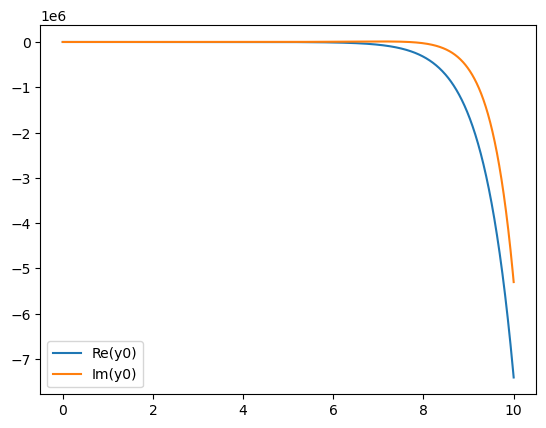

In [ ]:
def A(t):
    return np.array([[1, np.exp(1j*t)],
                     [np.exp(-1j*t), 1]])

y0 = np.array([1+0j, 0+0j])

def rhs(t, y):
    return A(t) @ y

t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

sol = solve_ivp(rhs, t_span, y0, t_eval=t_eval)

plt.plot(sol.t, sol.y[0].real, label='Re(y0)')
plt.plot(sol.t, sol.y[0].imag, label='Im(y0)')
plt.legend()
plt.show()